In [42]:
from pathlib import Path

%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import roc_curve, auc

In [43]:
auc_dat_dir = '/Users/zeleninam2/Documents/projects/cbcl_ksads_work/revision_2023/code/plotting/plot_data/'
datasets = ['ABCD: K-SADS child']
#reporters = ['child', 'parent']
hyps = ['1', '2a', '2b']
conds = ['cbcl', 'true']

In [44]:
auc_dat = []
for dataset in datasets:
    for hyp in hyps:
        # cbcl
        #cbcl_path = auc_dat_dir + 'ABCD_cbcl_'+hyp+'_child_baseline_both_cbcl.npy'
        #true_path = auc_dat_dir + 'ABCD_cbcl_'+hyp+'_child_baseline_both_true.npy'
        # bpm
        cbcl_path = auc_dat_dir + 'ABCD_ysr_'+hyp+'_child_optimal_both_ysr.npy'
        true_path = auc_dat_dir + 'ABCD_ysr_'+hyp+'_child_optimal_both_true.npy'
        
        cbcl_dat = np.load(cbcl_path)
        true_dat = np.load(true_path)
        fprs, tprs, _ = roc_curve(true_dat, cbcl_dat)
        roc_auc = auc(fprs, tprs)
        for fpr, tpr in zip(fprs, tprs):
            row = {}
            row['Dataset'] = dataset
            row['hypothesis'] = hyp
            row['FPR'] = fpr
            row['TPR'] = tpr
            row['AUC'] = roc_auc
            auc_dat.append(row)
auc_dat = pd.DataFrame(auc_dat)

In [45]:
hypothesis_cleaning = {'1': '1. Sensitivity',
                       '2a': '2a. Specificity',
                       '2b': '2b. Strict Specificity',}
auc_dat['Hypothesis'] = auc_dat.hypothesis.replace(hypothesis_cleaning)

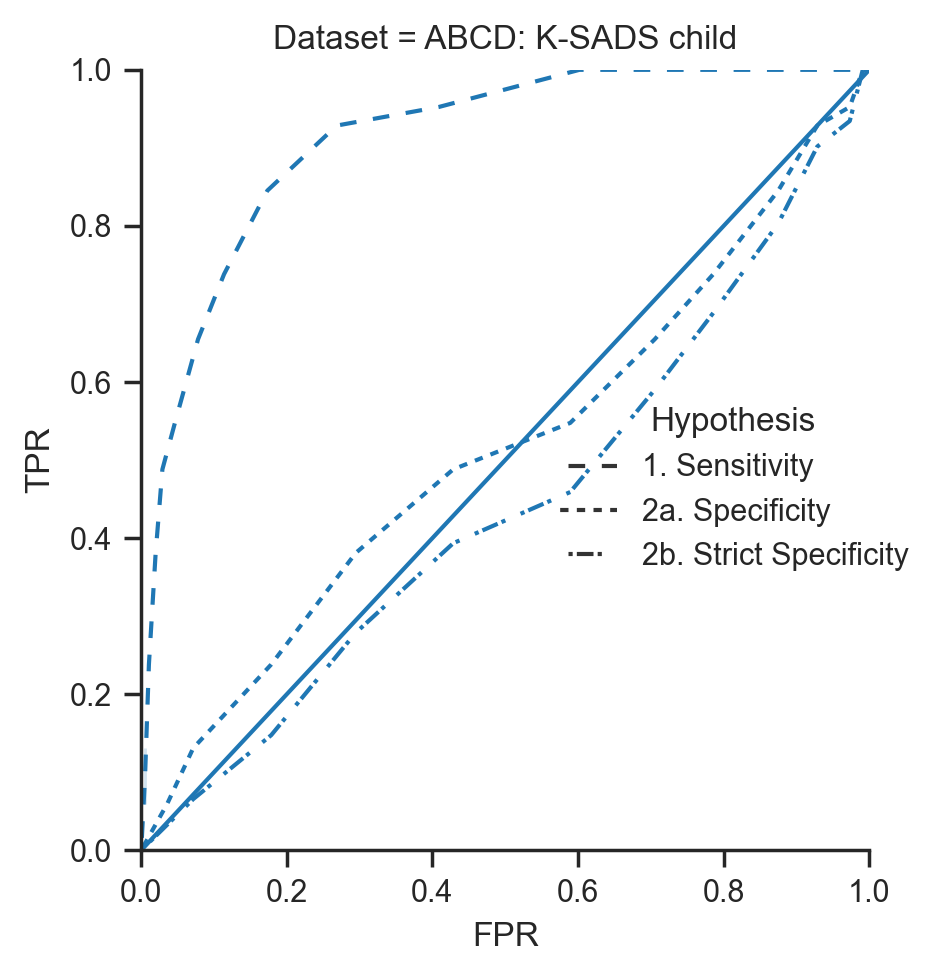

In [46]:
with sns.plotting_context('paper'):
    mydashes = [[0,3,1], [0,1,1], [0,3,1,1,1]]
    g = sns.relplot(x='FPR', y='TPR', data=auc_dat, style='Hypothesis', kind='line', row='Dataset', dashes = mydashes)
    g.fig.set_size_inches(3.75, 4)
    g.fig.set_dpi(250)
    for axrow in g.axes:
        for ax in axrow:
            ax.plot([0,1], [0,1])
            ax.set_xlim((0,1))
            ax.set_ylim((0,1))
    g.fig.tight_layout()